## EJERCICIO CON DATOS DE PEDIDOS SUPERSTORE

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Archivo Superstore_Dataset.xlsx, contiene datos de pedidos y devoluciones de unos grandes almacenes en dos hojas de cálculo, Orders y Returns
# Cargar el archivo Excel utilizando ExcelFile
ventas = pd.ExcelFile(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MACHINE LEARNING CON PYTHON ejercicios\4. Ejercicio pedidos superstore\Superstore_Dataset.xlsx')

In [3]:
# Crear DataFrames para cada hoja
orders = ventas.parse('Orders')
returns = ventas.parse('Returns')

In [4]:
orders

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5894,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,55.6470
5895,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332
5896,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.3932
5897,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200


In [5]:
returns

,Returned,Order ID
0,Yes,CA-2019-100762
1,Yes,CA-2019-100762
2,Yes,CA-2019-100762
3,Yes,CA-2019-100762
4,Yes,CA-2019-100867
...,...,...
795,Yes,US-2018-147886
796,Yes,US-2018-147998
797,Yes,US-2018-151127
798,Yes,US-2018-155999


In [6]:
# Hacer una combinación con merge por Order ID tipo inner (solamente salen resultado de los que están en ambas tablas)
resultado = pd.merge(orders, returns, on=['Order ID'], how='inner')

In [7]:
resultado

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returned
0,45,CA-2019-118255,2019-03-11,2019-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,Central,TEC-AC-10000171,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,45.980,2,19.7714,Yes
1,45,CA-2019-118255,2019-03-11,2019-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,Central,TEC-AC-10000171,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,45.980,2,19.7714,Yes
2,46,CA-2019-118255,2019-03-11,2019-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,17.460,2,8.2062,Yes
3,46,CA-2019-118255,2019-03-11,2019-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,17.460,2,8.2062,Yes
4,48,CA-2019-169194,2019-06-20,2019-06-25,Standard Class,LH-16900,Lena Hernandez,Consumer,United States,Dover,Delaware,East,TEC-AC-10002167,Technology,Accessories,Imation 8gb Micro Traveldrive Usb 2.0 Flash Drive,45.000,3,4.9500,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,CA-2019-109806,2019-09-17,2019-09-22,Standard Class,JS-15685,Jim Sink,Corporate,United States,Los Angeles,California,West,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,73.584,2,8.2782,Yes
90,92,CA-2019-109806,2019-09-17,2019-09-22,Standard Class,JS-15685,Jim Sink,Corporate,United States,Los Angeles,California,West,OFF-PA-10000304,Office Supplies,Paper,Xerox 1995,6.480,1,3.1104,Yes
91,92,CA-2019-109806,2019-09-17,2019-09-22,Standard Class,JS-15685,Jim Sink,Corporate,United States,Los Angeles,California,West,OFF-PA-10000304,Office Supplies,Paper,Xerox 1995,6.480,1,3.1104,Yes
92,92,CA-2019-109806,2019-09-17,2019-09-22,Standard Class,JS-15685,Jim Sink,Corporate,United States,Los Angeles,California,West,OFF-PA-10000304,Office Supplies,Paper,Xerox 1995,6.480,1,3.1104,Yes


In [8]:
# Hacer concatenación horizontal (salen los datos de todos y los que no tienen valor en Returned los pone como NaN)
resultado=pd.concat([orders, returns], axis=1)

In [9]:
resultado

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returned,Order ID
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136,Yes,CA-2019-100762
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820,Yes,CA-2019-100762
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,Yes,CA-2019-100762
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432,Yes,CA-2019-100762
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922,Yes,CA-2019-100867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5894,9989,CA-2020-163629,2020-11-17,2020-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,55.6470,NaN,NaN
5895,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,15.6332,NaN,NaN
5896,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,19.3932,NaN,NaN
5897,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200,NaN,NaN


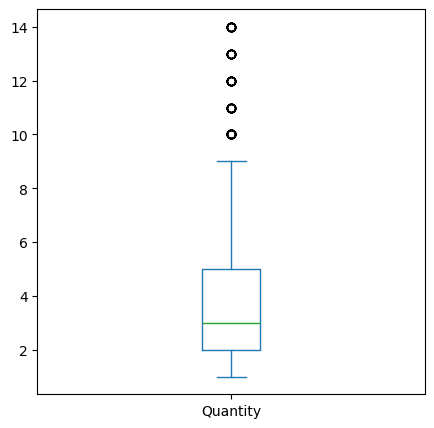

In [10]:
# Diagrama de caja de variable Quantity 
cantidad = orders.Quantity
figura, ax = plt.subplots(1,1,figsize=(5,5))
ax=cantidad.plot.box()

In [11]:
cantidad.describe()

count    5899.000000
mean        3.782506
std         2.212972
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  5899 non-null   int64         
 1   Order ID          5899 non-null   object        
 2   Order Date        5899 non-null   datetime64[ns]
 3   Ship Date         5899 non-null   datetime64[ns]
 4   Ship Mode         5899 non-null   object        
 5   Customer ID       5899 non-null   object        
 6   Customer Name     5899 non-null   object        
 7   Segment           5899 non-null   object        
 8   Country           5899 non-null   object        
 9   City              5899 non-null   object        
 10  State             5899 non-null   object        
 11  Region            5899 non-null   object        
 12  Product ID        5899 non-null   object        
 13  Category          5899 non-null   object        
 14  Sub-Category      5899 n

In [13]:
# Crear Dataframe llamado venta que contiene el número de artículos Quantity de cada producto vendido de los 5 primeros pedidos
# Se añade el tipo de producto Sub-Category como índice de la nueva tabla
ventas = orders['Quantity'] [0:5]
ventas.index=orders['Sub-Category'] [0:5]

In [14]:
ventas

Sub-Category
Bookcases    2
Chairs       3
Labels       2
Paper        3
Binders      3
Name: Quantity, dtype: int64

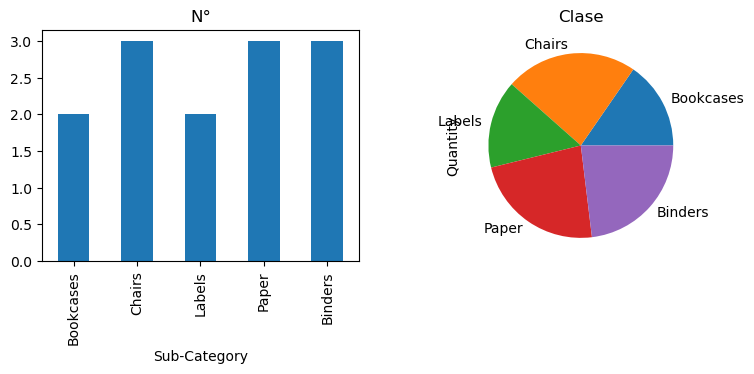

In [15]:
# Graficar
figura, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,3))
ventas.plot(ax=ax1, kind='bar', title='N°');
ventas.plot(ax=ax2, kind='pie', title='Clase');

In [16]:
ventas.describe()

count    5.000000
mean     2.600000
std      0.547723
min      2.000000
25%      2.000000
50%      3.000000
75%      3.000000
max      3.000000
Name: Quantity, dtype: float64

In [17]:
# Eliminar columnas categóricas con más de 4 clases
orders.select_dtypes(include=['object']).describe()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899,5899
unique,3002,4,773,773,3,1,452,49,4,1755,3,17,1742
top,CA-2020-100111,Standard Class,EP-13915,Emily Phan,Consumer,United States,New York City,California,West,TEC-AC-10003832,Office Supplies,Binders,Easy-staple paper
freq,14,3449,27,27,2996,5899,563,1189,1900,15,3568,915,27


In [18]:
cat_columns = orders.select_dtypes(include=['object']).columns
orders_red = orders
drop_list = []
for i, column in enumerate(cat_columns):
    if len(orders[column].unique()) > 4:
        drop_list.append(column)
orders_red = orders_red.drop(drop_list, axis='columns')
orders_red.columns

Index(['Row ID+O6G3A1:R6', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment',
       'Country', 'Region', 'Category', 'Sales', 'Quantity', 'Profit'],
      dtype='object')

In [19]:
# Dividir los datos de entrenamiento (80%), validación (5%) y test(15%). Usar Sales como variable de salida
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(
    orders_red.drop('Sales', axis='columns'), orders_red['Sales'],
    train_size=0.8, random_state=1234, shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_eval, y_eval,
    train_size=0.75, random_state=1234, shuffle=True
)

print(y_train.describe())
print(y_val.describe())
print(y_test.describe())

count     4719.000000
mean       228.967194
std        649.794795
min          0.836000
25%         17.480000
50%         52.680000
75%        205.063000
max      17499.950000
Name: Sales, dtype: float64
count     885.000000
mean      218.646338
std       503.918392
min         0.556000
25%        17.472000
50%        55.920000
75%       204.666400
max      9099.930000
Name: Sales, dtype: float64
count     295.000000
mean      231.941205
std       496.317752
min         0.444000
25%        17.290000
50%        57.360000
75%       242.450000
max      4164.050000
Name: Sales, dtype: float64


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4719 entries, 48 to 2863
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  4719 non-null   int64         
 1   Order Date        4719 non-null   datetime64[ns]
 2   Ship Date         4719 non-null   datetime64[ns]
 3   Ship Mode         4719 non-null   object        
 4   Segment           4719 non-null   object        
 5   Country           4719 non-null   object        
 6   Region            4719 non-null   object        
 7   Category          4719 non-null   object        
 8   Quantity          4719 non-null   int64         
 9   Profit            4719 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 405.5+ KB


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

In [22]:
# Seleccionar las columnas numéricas 
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['Row ID+O6G3A1:R6', 'Quantity', 'Profit']

In [23]:
# Seleccionar las columnas categóricas
cat_cols = X_train.select_dtypes(include=['object']).columns.to_list()
cat_cols

['Ship Mode', 'Segment', 'Country', 'Region', 'Category']

In [24]:
# Programar las transformaciones (numéricas y categóricas)
# Sobre las columnas numéricas: aplicar una imputación con el valor constante 0, y escalar la datos de 0 a 1.
numeric_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='constant', fill_value=0.0)),
    ('scaler', MinMaxScaler()) 
])
# Sobre las columnas categóricas: aplicar una imputación con el valor más frecuente, binarizar las columnas y eliminar las columnas redundantes.
categorical_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder()) 
])
# Crear un objeto preprocessor para agrupar todo en la transformación de columnas
preprocessor = ColumnTransformer(transformers=[ 
    ('numeric', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, cat_cols) 
])

In [25]:
X_train_prep = preprocessor.fit_transform(X_train) # Este fit.transform se hace para que os valores mínimos sean 0 y máximos sean 1
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)

In [27]:
# Es necesario reahacer los nombres de las columnas tras haber hecho la codificación onehot
encoded_cat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = pd.DataFrame(X_train_prep, columns=labels)
datos_train_prep.describe()

,Row ID+O6G3A1:R6,Quantity,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Country_United States,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
count,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.0,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000
mean,0.502579,0.212871,0.442013,0.160839,0.059758,0.195804,0.583598,0.507735,0.299428,0.192837,1.0,0.235855,0.284170,0.159992,0.319983,0.208519,0.608392,0.183090
std,0.288229,0.167949,0.018816,0.367421,0.237064,0.396861,0.493014,0.499993,0.458056,0.394568,0.0,0.424577,0.451066,0.366637,0.466519,0.406293,0.488162,0.386781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250350,0.076923,0.440121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.509408,0.153846,0.440566,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.745947,0.307692,0.441894,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
datos_val_prep = pd.DataFrame(X_val_prep, columns=labels)
datos_val_prep.describe()

,Row ID+O6G3A1:R6,Quantity,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Country_United States,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.0,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.500275,0.218774,0.441914,0.169492,0.054237,0.187571,0.588701,0.520904,0.296045,0.183051,1.0,0.231638,0.297175,0.140113,0.331073,0.222599,0.594350,0.183051
std,0.285361,0.179480,0.009449,0.375398,0.226613,0.390590,0.492348,0.499845,0.456769,0.386927,0.0,0.422118,0.457273,0.347300,0.470866,0.416226,0.491295,0.386927
min,0.002002,0.000000,0.379121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251301,0.076923,0.440138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.504404,0.153846,0.440622,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.745596,0.307692,0.441997,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,0.999400,1.000000,0.597732,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
datos_test_prep = pd.DataFrame(X_test_prep, columns=labels)
datos_test_prep.describe()

,Row ID+O6G3A1:R6,Quantity,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Country_United States,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.00000,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,0.506801,0.218514,0.441651,0.169492,0.047458,0.193220,0.589831,0.471186,0.332203,0.19661,1.0,0.213559,0.281356,0.176271,0.328814,0.227119,0.579661,0.193220
std,0.294607,0.178071,0.007743,0.375823,0.212977,0.395495,0.492700,0.500017,0.471804,0.39811,0.0,0.410516,0.450425,0.381698,0.470580,0.419682,0.494452,0.395495
min,-0.000100,0.000000,0.404103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240643,0.076923,0.440032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.534027,0.153846,0.440465,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.754203,0.307692,0.441626,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,0.990492,1.000000,0.502854,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
